# Mod 1 CRISP-DM Lab

## Objectives

By the end of this lab you will be able to:
- Understand the steps of the CRISP-DM model
- Apply the steps of the CRISP-DM model to a business problem using mod 2 skillsets

## CRoss-Industry Standard Process for Data Mining (CRISP-DM)

Before we dig into the problem, lets refresh our memories on the steps in the CRISP-DM model.

<img src="img/new_crisp-dm.png" width="300">

Why is it a big cycle if deployment is terminal?

### The Data

<img src="img/grocery-cart.jpg" width="300">

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.

The data is located in the csv called `big_mart.csv`  and was obtained from [this website](https://code.datasciencedojo.com/tshrivas/dojoHub/tree/a152a17dee24dcfcc10bb75c77c2e88cdcf90212/Big%20Mart%20Sales%20DataSet)

### Step 1: Business Understanding

From BigMart:

**The sales team at BigMart wants to understand the properties of products and stores which play a key role in sales of an item.  They ask you to use exploratory data analysis to shed light on which products they should continue stocking to maximize sales in particular store using the big_mart dataset.**


***
***
During the Business Understanding Stage, the goal is to get everyone on the same page and to provide clarity on the scope of the project for everyone involved, not just the Data Science team. Let's generate some questions we might ask the sales team about this project.

Questions for this stage include:
- Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
- What business problem(s) will this Data Science project solve for the organization?
- What problems are inside the scope of this project?
- What problems are outside the scope of this project?
- What data sources are available to us?
- What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
- Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

<img src="img/talking.jpeg" width="60" align='left'>

#### Turn and Talk


What questions might we want to ask prior to starting our analysis?



>Are all stores equally likely to experience technical glitches?

### Step 2: Data Understanding

During the Data Undertanding stage, we aim to get a solid understanding of the data needed to complete the project. This step includes both understanding where our data is coming from, as well as the information contained within the data.

Consider the following questions when working through this stage:
- What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
- Who controls the data sources, and what steps are needed to get access to the data?
- What is our target?
- What predictors are available to us?
- What data types are the predictors we'll be working with?
- What is the distribution of our data?
- How many observations does our dataset contain? Do we have a lot of data? Only a little?
- Do we have enough data to build a model? Will we need to use resampling methods?
- How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

<img src="img/big_mart_data_variables.png" width="500">

<img src="img/talking.jpeg" width="60" align='left'>

#### Turn and Talk


What steps might we take to better understand our data?


#### Let's explore our data so we can better understand it

In [2]:
# data understanding steps
import pandas as pd

bigmart = pd.read_csv('big_mart.csv')
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Beyond the obvious, a good reason to keep identifiers (e.g'd) is that you don't get useless things like "mean  value" where it doesn't exist. 

In [3]:
bigmart.Item_Fat_Content.unique()



array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

##Data prep should take "90%"??? of the time

### Step 3: Data Preparation

During the Data Preparation stage, we aim to prepare the data for our modeling steps.  

Things we might consider  when working through this stage are:
- Detecting and dealing with missing values
- Data type conversions (e.g. numeric data mistakenly encoded as strings)
- Checking for and removing multicollinearity (correlated predictors)
- Normalizing our numeric data
- Converting categorical data to numeric format through one-hot encoding



<img src="img/talking.jpeg" width="60" align='left'>

#### Turn and Talk


What specific things might we want to do to prepare this data for modeling?  What did we uncover during the last step that we need to address?


#### Now, let's start working on our data preparation

In [4]:
import matplotlib.pyplot as plt

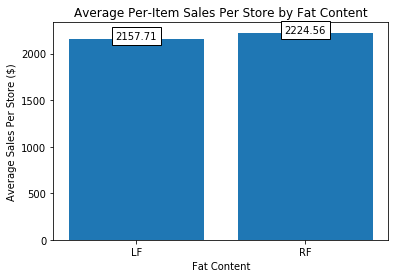

In [5]:
new_bigmart=bigmart.copy()
new_bigmart.Item_Fat_Content=bigmart.Item_Fat_Content.apply(lambda s: s.upper()[0]+'F')

new_bigmart.head()

data=new_bigmart.groupby('Item_Fat_Content').Item_Outlet_Sales.mean()

ax=plt.bar(data.index,height=data)
bars=ax.patches
xlocs=[R.xy[0]+R.get_width()/2 for R in bars]
ylocs=[R.get_height() for R in bars]
plt.ylim()
plt.xlabel('Fat Content')
plt.ylabel('Average Sales Per Store ($)')
plt.title('Average Per-Item Sales Per Store by Fat Content')



for n in range(2):    
    plt.text(xlocs[n],ylocs[n],str(round(ylocs[n],2)),horizontalalignment='center',bbox=dict(facecolor='white',alpha=1))

In [33]:
dir(bars[0])
bars[0].get_width()

0.8

Homework:  Create a bar graph of fat content vs mean item sales.  Be sure you have a title, x axis, y axis label.  Bonus points if you can get a number to appear "on" your visualization to give what the mean sales price is for each object. 


#### Before we go on to some data visualizations let's save our bigmart dataframe as a csv file so that we can use our cleaned data for future labs.

In [ ]:
df.to_csv('clean_big_mart.csv')

### Step 4: Modeling (or in our case EDA)

Once we have clean data, we can begin modeling! Remember, modeling, as with any of these other steps, is an iterative process. During this stage, we'll try to build and tune models to get the highest performance possible on our task.

In this lab we won't be using any statistical or machine learning models, instead we will be using data visualizations as our model.  However we want to guide our visualizations by asking very specific questions.  Some possible data visualization questions could be:

- What is the spread of a particular variable?
- How frequently is something happening?
- What is the most common?
- What is the relationship between two variables?
- How does a variable change over time?
- How does a variable differ depending on a categorical feature?


<img src="img/talking.jpeg" width="60" align='left'>

#### Turn and Talk

What is a more specific question about the bigmart data that we can answer through a data visualization?

####  Now let's create an amazing data visualization!!!